In [ ]:
#!pip install Pillow

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
import json

box_data = json(open('evas12b_json.json').read())

In [ ]:
from PIL import Image

folder_path = 'images'


json_data_v2 = {}

for image, image_data in box_data.items():
    filepath = os.path.join(folder_path, image_data['filename'])
    with Image.open(filepath) as img:
        width, height = img.size
    image_data['image_w'] = width
    image_data['image_h'] = height
    
    json_data_v2[image] = image_data
    

In [ ]:
json_data_v3 = {}
for image, image_data in json_data_v2.items():
    for index, region in enumerate(image_data['regions']):
        n_width = region['shape_attributes']['width'] / image_data['image_w']
        n_height = region['shape_attributes']['height'] / image_data['image_h']
        image_data['regions'][index]['shape_attributes']['n_width'] = n_width
        image_data['regions'][index]['shape_attributes']['n_height'] = n_height
        
    json_data_v3[image] = image_data

In [ ]:
wh_list = []
for image, image_data in json_data_v4.items():
    for index, region in enumerate(image_data['regions']):
        wh_list.append([math.log(region['shape_attributes']['n_width']), math.log(region['shape_attributes']['n_height'])])


In [2]:
# import json

# wh_list = json.loads(open('wh_list.json', 'r').read())

In [3]:
ratio_arr= np.array(wh_list)

len(ratio_arr)

352

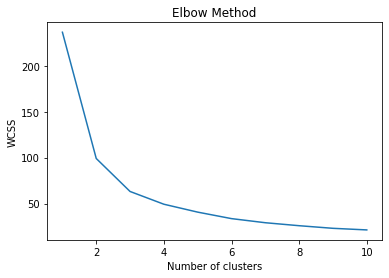

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(ratio_arr)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

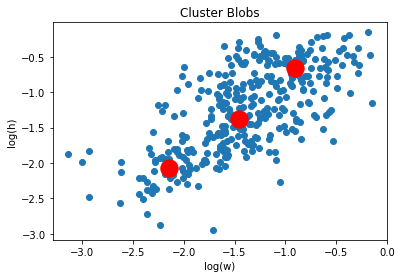

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=352, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(ratio_arr)
plt.scatter(ratio_arr[:,0], ratio_arr[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Cluster Blobs')
plt.xlabel('log(w)')
plt.ylabel('log(h)')
plt.show()